<a href="https://colab.research.google.com/github/Looma1116/Seungjoon_Lee/blob/main/w6_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classification (Iris)


### 데이터 설정

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = sns.load_dataset('iris')

x = iris.drop('species', axis = 1)
y = iris['species']

classle = LabelEncoder()
y = classle.fit_transform(iris['species'])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify = y, random_state = 1106)

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)


### 학습 및 추론  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html**

In [ ]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, splitter = 'random', random_state = 1)
dtc.fit(x_train_std, y_train)
y_train_pred = dtc.predict(x_train_std)
y_test_pred = dtc.predict(x_test_std)


### 결과 분석

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred, y_train))
print(metrics.accuracy_score(y_test_pred, y_test))

0.9619047619047619
0.9777777777777777


**criterion = 'gini' / max_depth = 3**  
Train_accu : 0.9619047619047619   
Test_accu : 0.9555555555555556   

---
**criterion = 'gini' / max_depth = 5**  
Train_accu : 1.0  
Test_accu : 0.9555555555555556   
___
**criterion = 'entropy' / max_depth = 2**  
Train_accu : 0.9619047619047619   
Test_accu : 0.9333333333333333   
___  

**criterion = 'entropy' / max_depth = 6**  
Train_accu : 1.0  
Test_accu : 0.9555555555555556    

---   
**criterion = 'entropy' / max_depth = 6 / splitter = 'random'**   
Train_accu : 0.9619047619047619  
Test_accu : 0.9777777777777777     


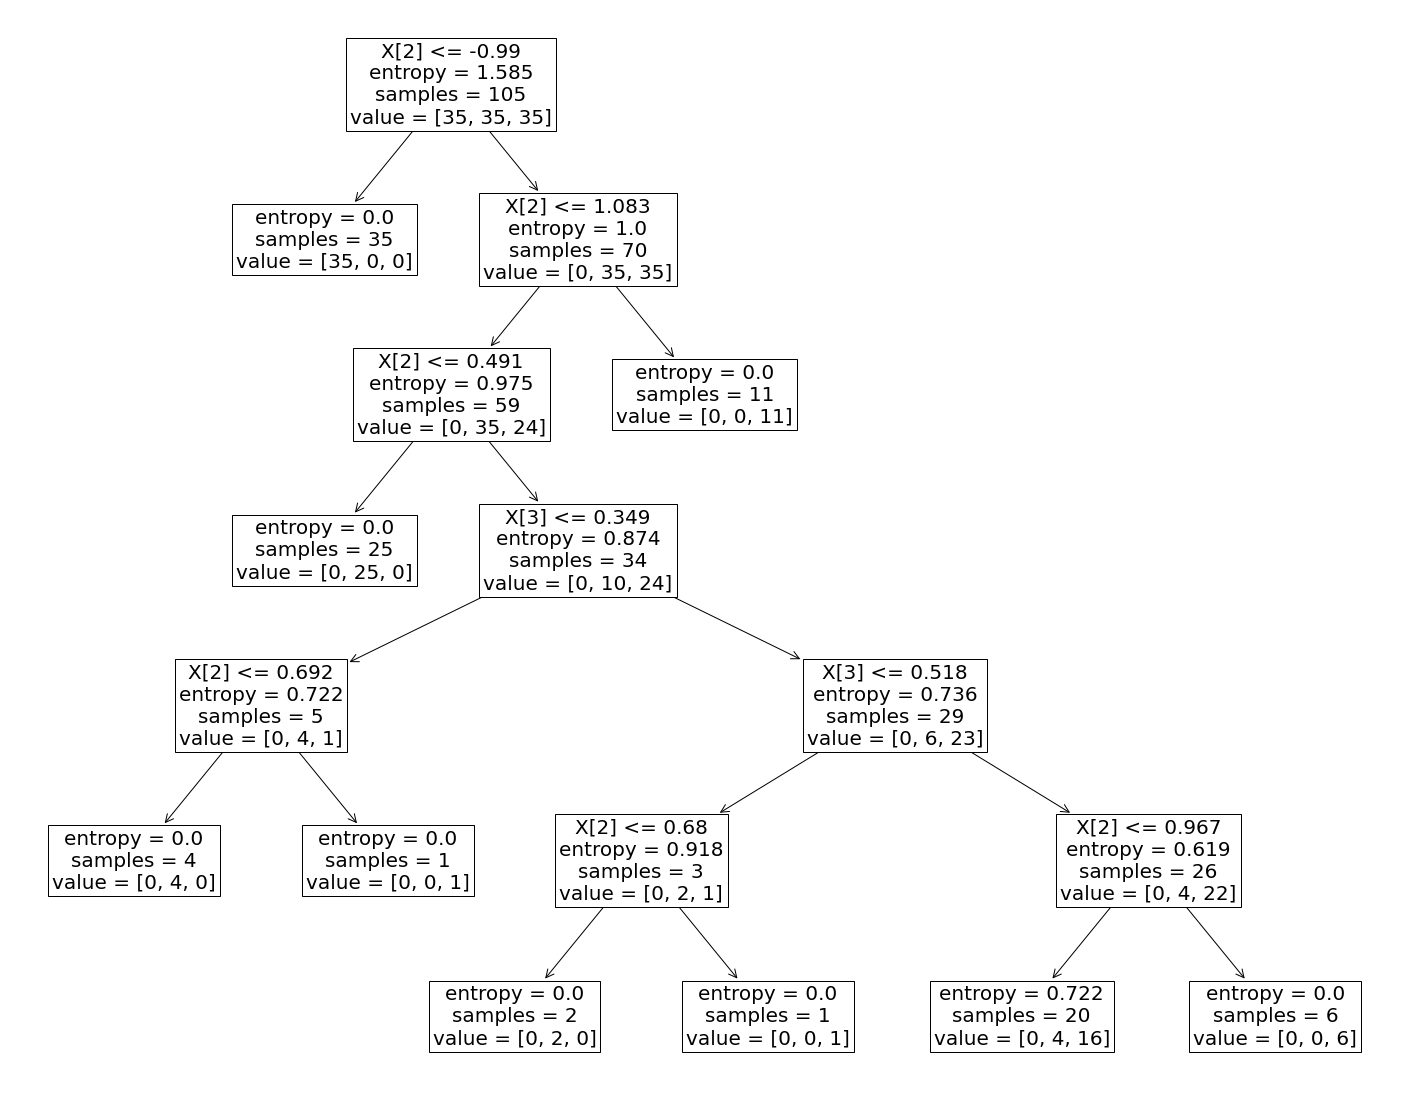

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,20))
tree.plot_tree(dtc.fit(x_train_std, y_train), fontsize=20)
plt.savefig('tree_high_dpi', dpi = 100)

# Decision Tree Regression (Selfmade orange (Feat. SUPERBEE)

### 데이터 설정

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1106)
X = np.sort(9 * rng.rand(80,1), axis = 0)
Y = np.sin(X).ravel()
Y[::5] += 3*(0.5 - rng.rand(16)) #Y를 5 간격으로 하면 16 차원임. 그래서 rand 차원도 16

Text(0, 0.5, 'label')

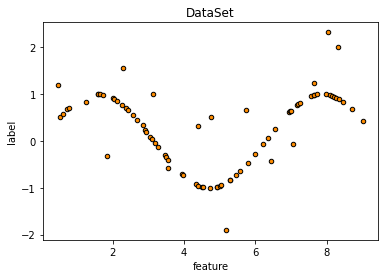

In [ ]:
plt.figure()
plt.scatter(X,Y, s =20, edgecolor ='black', c = 'darkorange', label ='data')
plt.title('DataSet')
plt.xlabel('feature')
plt.ylabel('label')

### 학습

In [ ]:
dtr_2 = DecisionTreeRegressor(max_depth=2)
dtr_5 = DecisionTreeRegressor(max_depth=5)
dtr_2.fit(X,Y)
dtr_5.fit(X,Y)
y_pred_2 = dtr_2.predict(X)
y_pred_5 = dtr_5.predict(X)

### 분석

Training Set

In [ ]:
from sklearn import metrics

print(metrics.mean_squared_error(Y,y_pred_2))
print(metrics.mean_squared_error(Y,y_pred_5))


0.24560306631341774
0.11267240335553548


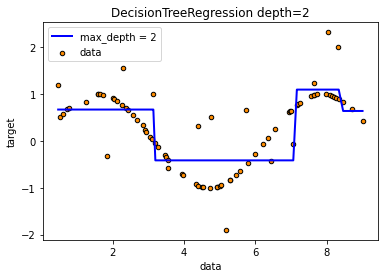

In [ ]:
plt.figure()
plt.scatter(X,Y,s=20, edgecolors='black', c='darkorange', label = "data")
plt.plot(X,y_pred_2,color='blue',label='max_depth = 2', linewidth = 2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('DecisionTreeRegression depth=2')
plt.legend()
plt.show()

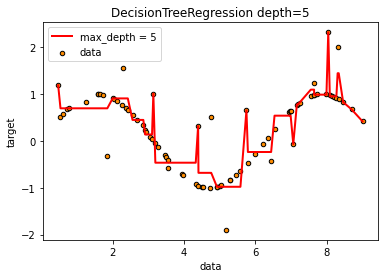

In [ ]:
plt.figure()
plt.scatter(X,Y,s=20, edgecolors='black', c='darkorange', label = "data")
plt.plot(X,y_pred_5,color='red',label='max_depth = 5', linewidth = 2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('DecisionTreeRegression depth=5')
plt.legend()
plt.show()

Testing Set

In [ ]:
X_test = 9 * np.random.random_sample((20,1))

y_test_pred_2 = dtr_2.predict(X_test)
y_test_pred_5 = dtr_5.predict(X_test)
Y_test = np.sin(X_test).ravel()
print('MSE of depth 2 is ', metrics.mean_squared_error(y_test_pred_2, Y_test))
print('MSE of depth 5 is ', metrics.mean_squared_error(y_test_pred_5, Y_test))

MSE of depth 2 is  0.19594701907750658
MSE of depth 5 is  0.056929477935379


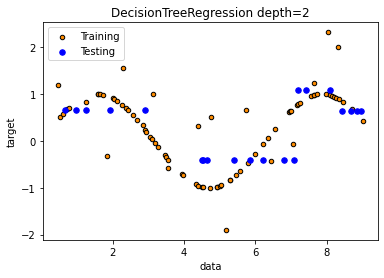

In [ ]:
plt.figure()
plt.scatter(X,Y,s=20, edgecolors='black', c='darkorange', label = "Training")
plt.scatter(X_test,y_test_pred_2,s = 30, c='blue',label='Testing')
plt.xlabel('data')
plt.ylabel('target')
plt.title('DecisionTreeRegression depth=2')
plt.legend()
plt.show()

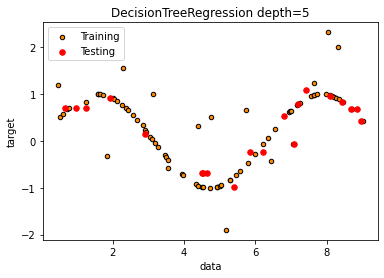

In [ ]:
plt.figure()
plt.scatter(X,Y,s=20, edgecolors='black', c='darkorange', label = "Training")
plt.scatter(X_test,y_test_pred_5,s=30,c='red',label='Testing')
plt.xlabel('data')
plt.ylabel('target')
plt.title('DecisionTreeRegression depth=5')
plt.legend()
plt.show()